<a href="https://colab.research.google.com/github/MazonSzymon/Project_COVID_portfolio/blob/main/project_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



#  ***Analysis of investing at GPW in 2020*** 

---













#Downloading libraries and creating wig20 table

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import pandas_datareader as pdr 
%load_ext google.colab.data_table

In [ ]:
#Set up plot
from cycler import cycler
plt.style.use('ggplot')
plt.rc('axes', facecolor='white', edgecolor='black', grid = False, axisbelow = True)
plt.rc('grid',color='gray', linestyle='solid', linewidth=0.5)
plt.rc('patch', edgecolor='black')
plt.rc('legend', shadow=True, handlelength=1, fontsize=10, edgecolor = 'black', facecolor='white')


In [ ]:
stocks_at_WIG20 = pd.DataFrame(np.array([
    ['WIG20' , 'wig20.pl'],
    ['Alior Bank' , 'alr.pl'],
    ['CCC' , 'ccc.pl'],
    ['CD projekt' , 'cdr.pl'],
    ['Cyfrowy Polsat SA' , 'cps.pl'],
    ['Dino Polska' , 'dnp.pl'],
    ['Jastrzebska Spolka Weglowa' , 'jsw.pl'],
    ['KGHM Polska Mied' , 'kgh.pl'],
    ['LPP' , 'lpp.pl'],
    ['Grupa Lotos SA' , 'lts.pl'],
    ['mBank' , 'mbk.pl'],
    ['Orange Polska' , 'opl.pl'],
    ['Bank Polka Kasa Opieki' , 'peo.pl'],
    ['PGE Polska Grupa Energetyczna' , 'pge.pl'],
    ['Polskie Gronictwo Naftowe i Gazownictwo' , 'pgn.pl'],
    ['Powszechna Kasa Oszczednosci Bank Polski' , 'pko.pl'],
    ['Play Communications SA' , 'ply.pl'],
    ['Powszechny Zaklad Ubezpieczen' , 'pzu.pl'],
    ['Santander Bank Polska' , 'spl.pl'],
    ['Tauron Polska Energia' , 'tpe.pl']
    ]), columns = ['Full_name','Short_name'])

# Functions

> ## For portfolios with one joint stock company

>> ### Downloading data

In [ ]:
def get_data(stock,start_date, end_date):
  stooq_data = pdr.get_data_stooq(stock['Short_name'], start = start_date, end = end_date).sort_index()
  stooq_data['Stock_name'] = stock['Full_name']
  df = stooq_data.copy()
  df.rename(columns = { stock['Short_name'] : 'stooq_data'},inplace = True)
  return df

>>### WIG20 Tabel

In [ ]:
def WIG20_frame(start_date,end_date):
  WIG20 = pd.DataFrame()
  for i in range(len(stocks_at_WIG20)):
    tmp = get_data(stocks_at_WIG20.iloc[i],start_date,end_date)
    WIG20 = WIG20.append(tmp)
  return WIG20

>> ### Basic informaction about data set

In [ ]:
def basic_summary_data(data):

  print("-"*50)
  print('5 first and 5 last record'+ "\n")
  print(df.head())
  print("-"*50)
  print(df.tail())
  print("-"*50+"\n")
  
  print('Summary of dataframe' + "\n")
  print(df.info())
  print("-"*50+"\n")
  
  print('Statistical summary' + "\n")
  print(df.describe())
  print("-"*50)

  return 

>>### Change interval

In [ ]:
def change_interval(data):
  
  print("-"*50)
  print("Week's mean" + "\n")
  print(df.resample('W').mean().tail())
  
  print("-"*50+"\n")
  print("Month's last value" + "\n")
  print(df.resample('M').last().tail())
  print("-"*50)
  return 

>>### Visualization of stock actions

In [ ]:
def make_graphics(data):
  plt.figure( figsize = (28, 8 ))
  #1
  plt.subplot(121)
  plt.plot(df['Close'], color = 'blue')
  plt.title('Stocks Value')
  plt.grid()
  #2
  plt.subplot(122)
  plt.plot(df['Volume'], color = 'red')
  plt.title('Volume')
  plt.grid()
  return plt.show()

>>### Relative change

In [ ]:
def relative_change(data):
  # Creating new columns with percentage change between the current and a prior element
  data['pct_change'] = data['Close'].pct_change()
  data['log_change'] = np.log(data['Close'].pct_change() + 1)

  # Graphs
  plt.figure(figsize=(28,8))
  #1
  plt.subplot(121)
  plt.plot(data['log_change'])
  #2
  plt.subplot(122)
  plt.hist(data['log_change'], bins = 50)
  
  return plt.show()

>>### Portfolio

In [393]:
def preparing_portfolio(total_investment, stock):
  
  #Downloading data
  portfolio = WIG20_by_stocks.get_group(stock)

  #Our portfolio
  portfolio_change = (1 + portfolio['Close'].pct_change()).cumprod().fillna(1).to_frame()
  portfolio_value = portfolio_change.multiply(total_investment).round(2).rename(columns = {'Close' : 'Value_of_investment'})
  portfolio_value['Close'] = portfolio['Close'].round(2)
  portfolio_value['Volume'] = portfolio['Volume'].round(2)
  portfolio_value['ROI'] = (1 + portfolio['Close'].pct_change()).cumprod().fillna(1).round(2)
  portfolio_value['Stock_name'] = portfolio['Stock_name'].values[0]
  

  return   portfolio_value

In [509]:
def portfolio_summary(portfolio):
  #Summary
  print("-"*50)
  print("At {start_date} We invested {initial_investment_value} PLN at {stock}".format(
      start_date = portfolio.index[0].date() , initial_investment_value = portfolio['Value_of_investment'][0], stock = portfolio['Stock_name'][0]
  ))
  print("-"*50)
  print("On {end_date} is worth {investment_value} PLN".format(
      end_date = portfolio.index[-1].date(), investment_value = portfolio['Value_of_investment'][-1]
  ))
  print("-"*50)
  print("Rate of investment is {ROI} %".format(
      ROI = (portfolio['ROI'][-1] -1)*100
  ))
  print("-"*50 + "\n")
  #Graphs
  plt.figure(figsize=(15,10))
  plt.plot(portfolio['Value_of_investment'])
  plt.title("Value of investment " + portfolio['Stock_name'][0], fontsize = 22, fontweight="bold")
  plt.grid()

  return

In [ ]:
def portfolio_compare(portfolio, benchmark):
  #compare
  print("-"*50)
  print("At {start_date} We invested {initial_investment_value} PLN at {stock}".format(
      start_date = portfolio.index[0].date() , initial_investment_value = portfolio['Value_of_investment'][0], stock = portfolio['Stock_name'][0]
  ))
  print("-"*50)
  print("On {end_date} is worth {investment_value} PLN, Rate of investment is {ROI} %".format(
      end_date = portfolio.index[-1].date(), investment_value = portfolio['Value_of_investment'][-1], ROI = (portfolio['ROI'][-1] -1)*100
  ))
  print("-"*50)
  print("Ratio investment to benchmark is {change}%".format(
     change = ((portfolio['Value_of_investment'][-1]/benchmark['Value_of_investment'][-1] - 1)*100).round(2)))
  print("-"*50+ "\n")
  #graphs
  plt.figure(figsize=(15,10))
  plt.plot(portfolio['Value_of_investment'], color = 'green', label = portfolio['Stock_name'][0])
  plt.plot(benchmark['Value_of_investment'], color = 'red', label = benchmark['Stock_name'][0])
  plt.title("Value of investment " + portfolio['Stock_name'][0], fontsize = 22, fontweight="bold")
  plt.grid()

  return

> ## For portfolios with more than one stocks

>>### Portfolio

In [684]:
def preparing_portfolio_v2(total_investments,stocks):
  
  #Get data to stock
  def get_frame(stock):
    return WIG20_by_stocks.get_group(stock)
  
  stocks_data = map(get_frame,stocks)
  df = pd.concat(stocks_data, keys = stocks, names= ['Stock','Date'])
  df = df.reset_index().pivot(index='Date',columns = 'Stock', values = ['Close','Volume'])
  portfolio_change = (1 + df[['Close']].pct_change()).cumprod().fillna(1).round(2).rename(columns = {'Close' : 'ROI'})
  investment_value = portfolio_change.multiply(total_investments).rename(columns = {'ROI' : 'Investments_value'})
  investment_value['Sum_of_investments'] = investment_value.sum(axis=1)
  portfolio_value = pd.concat([df,portfolio_change,investment_value], axis = 1)
  portfolio_value['ROI_of_investments'] = (1 + portfolio_value[['Sum_of_investments']].pct_change()).cumprod().fillna(1).round(2)
  return portfolio_value

In [622]:
def portfolio_summary_v2(portfolio):
  #Stocks list
  lista = portfolio.columns.to_frame()['Stock'].values
  new_list = ''
  for i in range(int(len(lista)/5)):
    new_list = new_list + lista[i]
    if i < len(lista)/5 -1:
      new_list = new_list + ", "

  #Summary
  print("-"*50)
  print("At {start_date} We invested {initial_investment_value} PLN at {stocks}".format(
      start_date = portfolio.index[0].date() , initial_investment_value = portfolio['Sum_of_investments'][0], stocks = new_list
  ))
  print("-"*50)
  print("On {end_date} is worth {investment_value} PLN".format(
      end_date = portfolio.index[-1].date(), investment_value = portfolio['Sum_of_investments'][-1]
  ))
  print("-"*50)
  print("Rate of investment is {ROI} %".format(
      ROI = ((portfolio['Sum_of_investments'][-1]/portfolio['Sum_of_investments'][0] -1)*100).round(2)
  ))
  print("-"*50 + "\n")
  #Graphs
  plt.figure( figsize = (28, 8 ))
  #1
  plt.subplot(121)
  for i in range(int(len(lista)/5)):
    plt.plot(portfolio[['Investments_value'][0]][portfolio[['Investments_value'][0]].columns[i]], label = portfolio[['Investments_value'][0]].columns[i])
  plt.grid()
  plt.legend()
  plt.title('Value of investments by stocks')
  plt.subplot(122)
  plt.plot(portfolio['Sum_of_investments'])
  plt.title('Value of investment')
  plt.grid()
  plt.show()

  return

In [643]:
def portfolio_compare_v2(portfolio, benchmark):
  #Stocks list
  lista = portfolio.columns.to_frame()['Stock'].values
  new_list = ''
  for i in range(int(len(lista)/5)):
    new_list = new_list + lista[i]
    if i < len(lista)/5 -1:
      new_list = new_list + ", "
  #compare
  print("-"*50)
  print("At {start_date} We invested {initial_investment_value} PLN at {stocks}".format(
      start_date = portfolio.index[0].date() , initial_investment_value = portfolio['Sum_of_investments'][0], stocks = new_list
  ))
  print("-"*50)
  print("On {end_date} is worth {investment_value} PLN, Rate of investment is {ROI} %".format(
      end_date = portfolio.index[-1].date(), investment_value = portfolio['Sum_of_investments'][-1],
      ROI = ((portfolio['Sum_of_investments'][-1]/portfolio['Sum_of_investments'][0] -1)*100).round(2)
  ))
  
     
  print("Ratio investment to benchmark is {change}%".format(
     change = ((portfolio['Sum_of_investments'][-1]/benchmark['Value_of_investment'][-1] - 1)*100).round(2)))
  print("-"*50+ "\n")
  #graphs
  plt.figure(figsize=(15,10))
  plt.plot(portfolio['Sum_of_investments'], color = 'green', label = new_list)
  plt.plot(benchmark['Value_of_investment'], color = 'red',label = benchmark['Stock_name'][0])
  plt.title("Value of investment " + new_list, fontsize = 22, fontweight="bold")
  plt.grid()
  plt.legend()

  return

# WIG20

In [ ]:
#start_date = dt.datetime(2020,1,1)
#end_date = dt.date.today()
#WIG20_tabel = WIG20_frame(start_date,end_date) Run onc time because its API

In [ ]:
WIG20_tabel

,Open,High,Low,Close,Volume,Stock_name
Date,,,,,,
2020-01-02,2161.550,2200.570,2161.420,2200.100,21369888,WIG20
2020-01-03,2192.310,2192.310,2159.030,2173.970,20627251,WIG20
2020-01-07,2171.720,2176.800,2143.110,2145.010,19556434,WIG20
2020-01-08,2140.290,2140.290,2114.240,2115.990,20739943,WIG20
2020-01-09,2132.020,2157.610,2132.020,2157.610,19887696,WIG20
...,...,...,...,...,...,...
2020-10-09,2.254,2.254,2.052,2.082,8529272,Tauron Polska Energia
2020-10-12,2.096,2.126,2.040,2.062,3668557,Tauron Polska Energia
2020-10-13,2.086,2.092,1.965,1.965,3351472,Tauron Polska Energia


In [ ]:
WIG20_by_stocks = WIG20_tabel.groupby('Stock_name') #This is our basic tabel to creating portfolios !!!!!!!!!!!!!!!!!

# Portfolio

In [689]:
my_stocks = ['CCC','CD projekt','Dino Polska','Orange Polska']
investments = [500,1000,500,500]
benchmark = 'WIG20'
benchmark_portfolio = preparing_portfolio(sum(investments), benchmark)
my_portfolio = preparing_portfolio_v2(investments,my_stocks)

--------------------------------------------------
At 2020-01-02 We invested 2500.0 PLN at CCC, CD projekt, Dino Polska, 
--------------------------------------------------
On 2020-10-15 is worth 2735.0 PLN
--------------------------------------------------
Rate of investment is 9.4 %
--------------------------------------------------



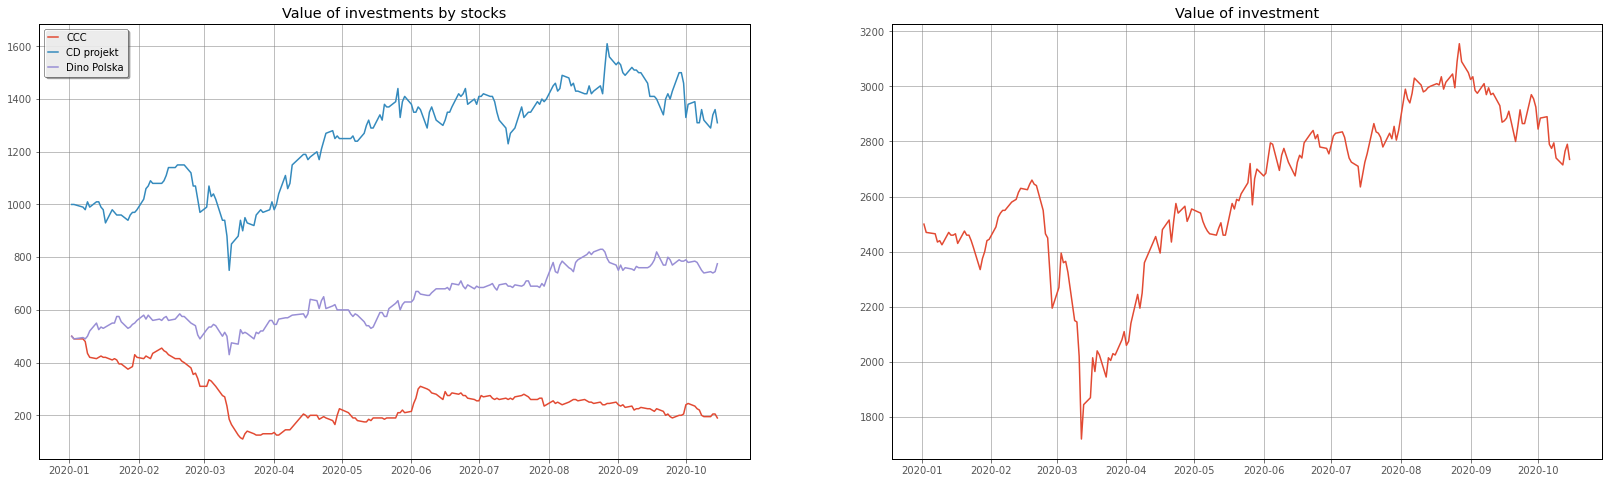

In [690]:
portfolio_summary_v2(my_portfolio)

--------------------------------------------------
At 2020-01-02 We invested 2500.0 PLN at CCC, CD projekt, Dino Polska, 
--------------------------------------------------
On 2020-10-15 is worth 2735.0 PLN, Rate of investment is 9.4 %
Ratio investment to benchmark is 47.88%
--------------------------------------------------



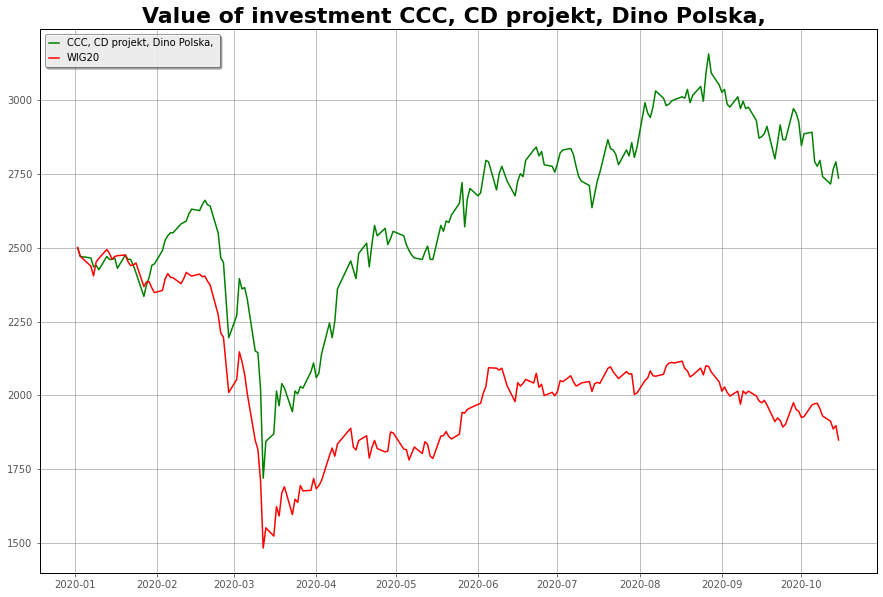

In [692]:
portfolio_compare_v2(my_portfolio,benchmark_portfolio)